<a href="https://colab.research.google.com/github/RoshanAcharya11/Foundationofdatascience/blob/main/HIT140.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import gdown

# Replace with your actual file IDs
url1 = "https://drive.google.com/uc?id=1n2kyPTpzc6cBkJ6EL0fnjAjpAkExjfai"
url2 = "https://drive.google.com/uc?id=1B5daoddVrswV98hU6_TmUWP5yVlOHXbi"

gdown.download(url1, "dataset1.csv", quiet=False)
gdown.download(url2, "dataset2.csv", quiet=False)

import pandas as pd
bat_datas = pd.read_csv("dataset1.csv")
rat_datas = pd.read_csv("dataset2.csv")


# Topic of Investigation
# - Does Bat see Rats only as a food competitor? or also as a predator?
# - If Bat thinks rat as predators, will they show any more avoidance?
# Note: The entire question revolves around how Bat conceives Rats regarding food or predatorial danger

#Necessary imports
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
import os

# Define paths to datasets in Google Drive (adjust folder path as needed)
drive_path = '/content/drive/My Drive/HIT140_Assessment2/' # Make sure this path is correct
dataset1_path = os.path.join(drive_path, 'dataset1.csv')
dataset2_path = os.path.join(drive_path, 'dataset2.csv')

dataset1_path = "/content/dataset1.csv"
dataset2_path = "/content/dataset2.csv"

# Loading datasets
try:
    bat_datas = pd.read_csv (dataset1_path) # bat behaviour
    rat_datas = pd.read_csv (dataset2_path) # rat behaviour
except FileNotFoundError:
    print(f"Error: One or both datasets not found in Google Drive. Please ensure they are in {drive_path}")
    print("List files in folder: !ls '/content/drive/My Drive/HIT140_Assessment2'")
    raise # Re-raise the error if files are not found

# Printing first 10 values from bat and rat
print(bat_datas.head(10))
print(rat_datas.head(10))

print(bat_datas[["bat_landing_to_food", "seconds_after_rat_arrival"]].isna().sum())
print("\n All bat datas before cleaning:", len(bat_datas))

# Handle missing values in 'seconds_after_rat_arrival'
# Null value is filled by 301
bat_datas["seconds_after_rat_arrival"].fillna(301, inplace=True)

# Remove extreme values in hesitation time using IQR method
Q1 = bat_datas["bat_landing_to_food"].quantile(0.25)
Q3 = bat_datas["bat_landing_to_food"].quantile(0.75)
IQR = Q3 - Q1
bat_datas=bat_datas[(bat_datas["bat_landing_to_food"] >= Q1 - 1.5 * IQR) & (bat_datas["bat_landing_to_food"] <= Q3 + 1.5 * IQR)]

print("All bat datas after removing the unclear values:", len(bat_datas))

# Feature engineering: Create 'rats_close' column
bat_datas["rats_close"] = ((bat_datas["seconds_after_rat_arrival"] >= 0) & (bat_datas["seconds_after_rat_arrival"] <= 300)).astype(int)


print("\n Rat presence column check(first 1- rows): ")
print(bat_datas[["seconds_after_rat_arrival", "rats_close"]].head(10))

# Implementing descriptive analysis
risk_table = pd.crosstab(bat_datas['risk'], bat_datas["rats_close"])
print("\n Table of Risk Vs Rats close: \n", risk_table)

reward_table = pd.crosstab(bat_datas["reward"], bat_datas["rats_close"])
print("\n Table of Reward vs Rats close:\n", reward_table)

print("\n Hesitation time by behavior type: \n", bat_datas.groupby("habit")["bat_landing_to_food"].describe())

# Implementing inferential analysis

# Risk vs rats -> Chi-square
chi, p_val_risk, _, _ = chi2_contingency(risk_table)
print("\n Test for Risk and Rats (Chi-square p-value): ", p_val_risk)

#Reward vs rats -> chi-square
chi2, p_val_reward, _, _ = chi2_contingency(reward_table)
print("Test for reward and rats(Chi-square p-value): ", p_val_reward)

# Bonferroni correction for multiple Chi-square tests (2 tests)
bonferroni_p_risk = p_val_risk * 2
bonferroni_p_reward = p_val_reward * 2
print("\nBonferroni-corrected p-value for Risk:", min(1, bonferroni_p_risk))
print("Bonferroni-corrected p-value for Reward:", min(1, bonferroni_p_reward))


#Hesitation time vs rats -> Mann-Whitney U
hesitation_with_rats = bat_datas[bat_datas["rats_close"] == 1] ["bat_landing_to_food"]
hesitation_without_rats = bat_datas[bat_datas["rats_close"] == 0] ["bat_landing_to_food"]

if len(hesitation_with_rats) > 0 and len(hesitation_without_rats) > 0:
  u_stat, u_pval = mannwhitneyu(hesitation_with_rats, hesitation_without_rats, alternative="two-sided")
  print("Test for hesitation time (Mann-WHitney p-value):", u_pval)
else:
  print("Hesitation test skipped: insufficient groups")

Downloading...
From: https://drive.google.com/uc?id=1n2kyPTpzc6cBkJ6EL0fnjAjpAkExjfai
To: /content/dataset1.csv
100%|██████████| 90.4k/90.4k [00:00<00:00, 61.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1B5daoddVrswV98hU6_TmUWP5yVlOHXbi
To: /content/dataset2.csv
100%|██████████| 77.1k/77.1k [00:00<00:00, 37.1MB/s]

         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   
5  30/12/2017 19:54            24.000000   rat  30/12/2017 19:50   
6  30/12/2017 19:54            13.000000   rat  30/12/2017 19:50   
7  26/12/2017 21:24            15.000000   rat  26/12/2017 21:22   
8  26/12/2017 21:24             6.000000  pick  26/12/2017 21:22   
9  26/12/2017 21:24             3.000000  fast  26/12/2017 21:22   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                   


/tmp/ipython-input-43717694.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bat_datas["seconds_after_rat_arrival"].fillna(301, inplace=True)


# New Section


Test for Hesitation Time (p-value): 0.6445218212818398


<Figure size 800x600 with 0 Axes>

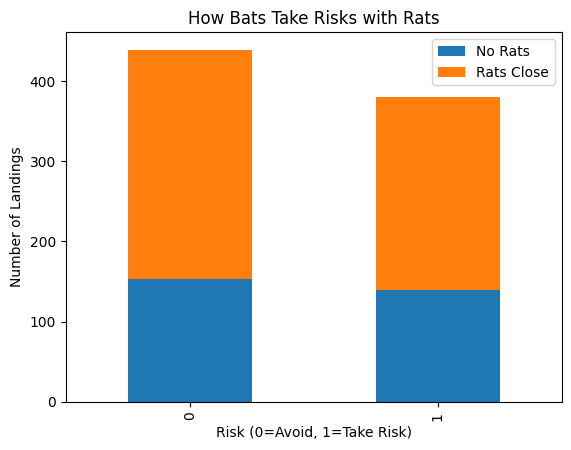

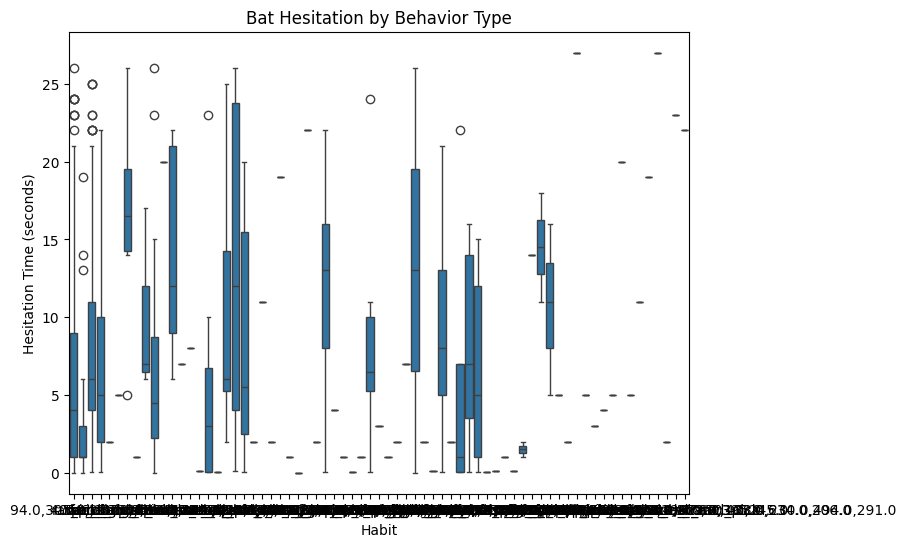

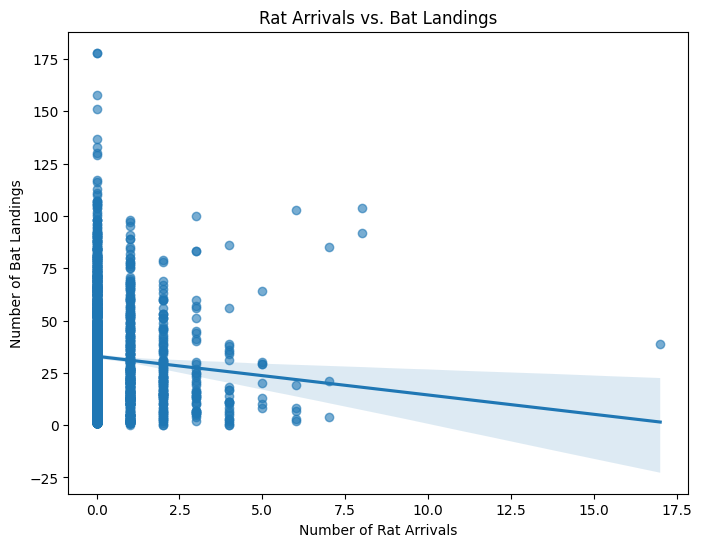

In [11]:
# Test if hesitation time differs with rats
hesitation_by_rats = bat_datas[bat_datas["rats_close"] == 1]["bat_landing_to_food"]
no_hesitation_rats = bat_datas[bat_datas["rats_close"] == 0]["bat_landing_to_food"]

if len(no_hesitation_rats) > 0 and len(hesitation_by_rats) > 0:
    u_stat, u_pval = mannwhitneyu(
        hesitation_by_rats,
        no_hesitation_rats,
        alternative="two-sided"
    )
    print("\nTest for Hesitation Time (p-value):", u_pval)
else:
    print("\nHesitation test skipped: No data for rats_close = 0 or rats_close = 1. Using habit analysis as fallback.")


# Plot 1: Bar chart for risk
plt.figure(figsize=(8, 6))
risk_table.plot(kind="bar", stacked=True)
plt.title("How Bats Take Risks with Rats")
plt.xlabel("Risk (0=Avoid, 1=Take Risk)")
plt.ylabel("Number of Landings")
plt.legend(["No Rats", "Rats Close"])
plt.savefig("/content/risk_plot.png")
plt.show()

# Plot 2: Boxplot for hesitation by habit
plt.figure(figsize=(8, 6))
sns.boxplot(x="habit", y="bat_landing_to_food", data=bat_datas)
plt.title("Bat Hesitation by Behavior Type")
plt.xlabel("Habit")
plt.ylabel("Hesitation Time (seconds)")
plt.savefig("/content/hesitation_by_habit_plot.png")
plt.show()

# Plot 3: Scatter plot for correlation
if "rat_arrival_number" in rat_datas.columns and "bat_landing_number" in rat_datas.columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(x="rat_arrival_number", y="bat_landing_number", data=rat_datas, scatter_kws={"alpha": 0.6})
    plt.title("Rat Arrivals vs. Bat Landings")
    plt.xlabel("Number of Rat Arrivals")
    plt.ylabel("Number of Bat Landings")
    plt.savefig("/content/correlation_plot.png")
    plt.show()
else:
    print("Scatter plot skipped: 'rat_arrival_number' or 'bat_landing_number' missing")



Downloading...
From: https://drive.google.com/uc?id=1n2kyPTpzc6cBkJ6EL0fnjAjpAkExjfai
To: /content/dataset1.csv
100%|██████████| 90.4k/90.4k [00:00<00:00, 59.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1B5daoddVrswV98hU6_TmUWP5yVlOHXbi
To: /content/dataset2.csv
100%|██████████| 77.1k/77.1k [00:00<00:00, 56.0MB/s]


Google Drive already mounted.
         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   
5  30/12/2017 19:54            24.000000   rat  30/12/2017 19:50   
6  30/12/2017 19:54            13.000000   rat  30/12/2017 19:50   
7  26/12/2017 21:24            15.000000   rat  26/12/2017 21:22   
8  26/12/2017 21:24             6.000000  pick  26/12/2017 21:22   
9  26/12/2017 21:24             3.000000  fast  26/12/2017 21:22   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12

/tmp/ipython-input-3660425183.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bat_datas["seconds_after_rat_arrival"].fillna(301, inplace=True)


<Figure size 800x600 with 0 Axes>

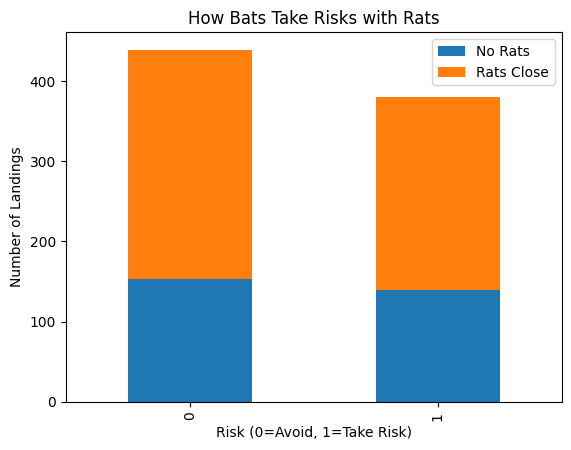

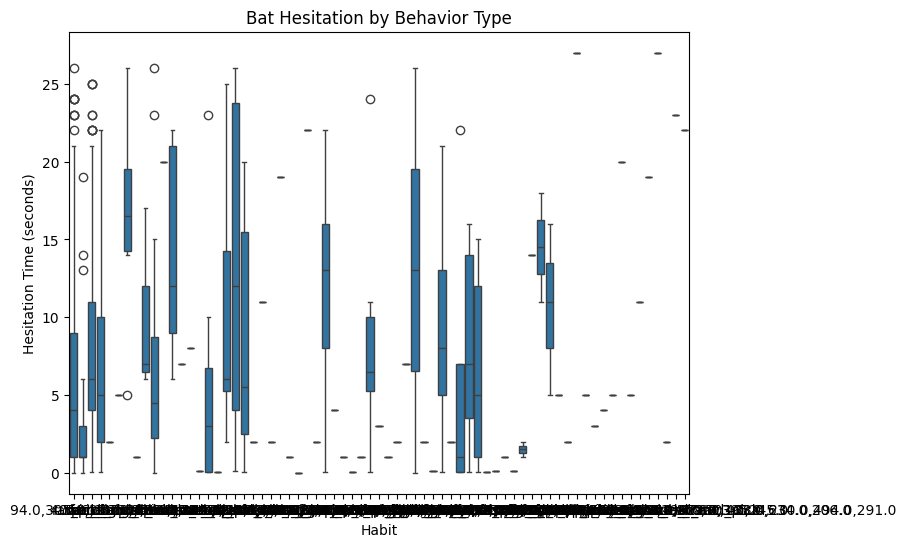

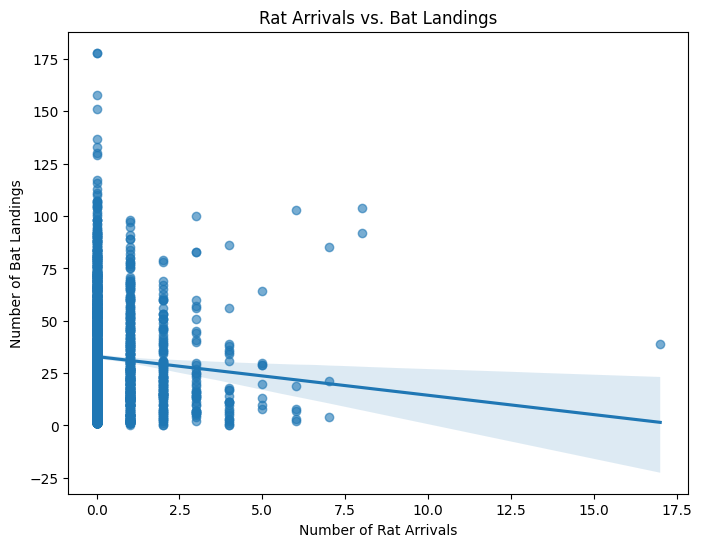

In [ ]:
import gdown

# Replace with your actual file IDs
url1 = "https://drive.google.com/uc?id=1n2kyPTpzc6cBkJ6EL0fnjAjpAkExjfai"
url2 = "https://drive.google.com/uc?id=1B5daoddVrswV98hU6_TmUWP5yVlOHXbi"

gdown.download(url1, "dataset1.csv", quiet=False)
gdown.download(url2, "dataset2.csv", quiet=False)

import pandas as pd
bat_datas = pd.read_csv("dataset1.csv")
rat_datas = pd.read_csv("dataset2.csv")


# Topic of Investigation
# - Does Bat see Rats only as a food competitor? or also as a predator?
# - If Bat thinks rat as predators, will they show any more avoidance?
# Note: The entire question revolves around how Bat conceives Rats regarding food or predatorial danger

#Necessary imports
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
import os
from google.colab import drive

# Mount Google Drive (if not already mounted)
try:
    drive.mount('/content/drive', force_remount=True)
except:
    print("Google Drive already mounted.")

# Define paths to datasets in Google Drive (adjust folder path as needed)
drive_path = '/content/drive/My Drive/HIT140_Assessment2/' # Make sure this path is correct
dataset1_path = os.path.join(drive_path, 'dataset1.csv')
dataset2_path = os.path.join(drive_path, 'dataset2.csv')

dataset1_path = "/content/dataset1.csv"
dataset2_path = "/content/dataset2.csv"

# Loading datasets
try:
    bat_datas = pd.read_csv (dataset1_path) # bat behaviour
    rat_datas = pd.read_csv (dataset2_path) # rat behaviour
except FileNotFoundError:
    print(f"Error: One or both datasets not found in Google Drive. Please ensure they are in {drive_path}")
    print("List files in folder: !ls '/content/drive/My Drive/HIT140_Assessment2'")
    raise # Re-raise the error if files are not found

# Printing first 10 values from bat and rat
print(bat_datas.head(10))
print(rat_datas.head(10))

print(bat_datas[["bat_landing_to_food", "seconds_after_rat_arrival"]].isna().sum())
print("\n All bat datas before cleaning:", len(bat_datas))

# Handle missing values in 'seconds_after_rat_arrival'
# Null value is filled by 301
bat_datas["seconds_after_rat_arrival"].fillna(301, inplace=True)

# Remove extreme values in hesitation time using IQR method
Q1 = bat_datas["bat_landing_to_food"].quantile(0.25)
Q3 = bat_datas["bat_landing_to_food"].quantile(0.75)
IQR = Q3 - Q1
bat_datas=bat_datas[(bat_datas["bat_landing_to_food"] >= Q1 - 1.5 * IQR) & (bat_datas["bat_landing_to_food"] <= Q3 + 1.5 * IQR)]

print("All bat datas after removing the unclear values:", len(bat_datas))

# Feature engineering: Create 'rats_close' column
bat_datas["rats_close"] = ((bat_datas["seconds_after_rat_arrival"] >= 0) & (bat_datas["seconds_after_rat_arrival"] <= 300)).astype(int)


print("\n Rat presence column check(first 1- rows): ")
print(bat_datas[["seconds_after_rat_arrival", "rats_close"]].head(10))

# Implementing descriptive analysis
risk_table = pd.crosstab(bat_datas['risk'], bat_datas["rats_close"])
print("\n Table of Risk Vs Rats close: \n", risk_table)

reward_table = pd.crosstab(bat_datas["reward"], bat_datas["rats_close"])
print("\n Table of Reward vs Rats close:\n", reward_table)

print("\n Hesitation time by behavior type: \n", bat_datas.groupby("habit")["bat_landing_to_food"].describe())

# Implementing inferential analysis

# Risk vs rats -> Chi-square
chi, p_val_risk, _, _ = chi2_contingency(risk_table)
print("\n Test for Risk and Rats (Chi-square p-value): ", p_val_risk)

#Reward vs rats -> chi-square
chi2, p_val_reward, _, _ = chi2_contingency(reward_table)
print("Test for reward and rats(Chi-square p-value): ", p_val_reward)

# Bonferroni correction for multiple Chi-square tests (2 tests)
bonferroni_p_risk = p_val_risk * 2
bonferroni_p_reward = p_val_reward * 2
print("\nBonferroni-corrected p-value for Risk:", min(1, bonferroni_p_risk))
print("Bonferroni-corrected p-value for Reward:", min(1, bonferroni_p_reward))


#Hesitation time vs rats -> Mann-Whitney U
hesitation_with_rats = bat_datas[bat_datas["rats_close"] == 1] ["bat_landing_to_food"]
hesitation_without_rats = bat_datas[bat_datas["rats_close"] == 0] ["bat_landing_to_food"]

if len(hesitation_with_rats) > 0 and len(hesitation_without_rats) > 0:
  u_stat, u_pval = mannwhitneyu(hesitation_with_rats, hesitation_without_rats, alternative="two-sided")
  print("Test for hesitation time (Mann-WHitney p-value):", u_pval)
else:
  print("Hesitation test skipped: insufficient groups")
  # Test if hesitation time differs with rats
hesitation_by_rats = bat_datas[bat_datas["rats_close"] == 1]["bat_landing_to_food"]
no_hesitation_rats = bat_datas[bat_datas["rats_close"] == 0]["bat_landing_to_food"]

if len(no_hesitation_rats) > 0 and len(hesitation_by_rats) > 0:
    u_stat, u_pval = mannwhitneyu(
        hesitation_by_rats,
        no_hesitation_rats,
        alternative="two-sided"
    )
    print("\nTest for Hesitation Time (p-value):", u_pval)
else:
    print("\nHesitation test skipped: No data for rats_close = 0 or rats_close = 1. Using habit analysis as fallback.")


# Plot 1: Bar chart for risk
plt.figure(figsize=(8, 6))
risk_table.plot(kind="bar", stacked=True)
plt.title("How Bats Take Risks with Rats")
plt.xlabel("Risk (0=Avoid, 1=Take Risk)")
plt.ylabel("Number of Landings")
plt.legend(["No Rats", "Rats Close"])
plt.savefig("/content/risk_plot.png")
plt.show()

# Plot 2: Boxplot for hesitation by habit
plt.figure(figsize=(8, 6))
sns.boxplot(x="habit", y="bat_landing_to_food", data=bat_datas)
plt.title("Bat Hesitation by Behavior Type")
plt.xlabel("Habit")
plt.ylabel("Hesitation Time (seconds)")
plt.savefig("/content/hesitation_by_habit_plot.png")
plt.show()

# Plot 3: Scatter plot for correlation
if "rat_arrival_number" in rat_datas.columns and "bat_landing_number" in rat_datas.columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(x="rat_arrival_number", y="bat_landing_number", data=rat_datas, scatter_kws={"alpha": 0.6})
    plt.title("Rat Arrivals vs. Bat Landings")
    plt.xlabel("Number of Rat Arrivals")
    plt.ylabel("Number of Bat Landings")
    plt.savefig("/content/correlation_plot.png")
    plt.show()
else:
    print("Scatter plot skipped: 'rat_arrival_number' or 'bat_landing_number' missing")

